# Predict the closing stock price

In [ ]:
# Description: This program uses an artificial recurrent network called Long Short Term Memory to predict the closing stock price fo a corporation using the past 60 day stock price

In [ ]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#  Get the stock quote
company = 'AAPL'
start = dt.datetime(2020,1,1)
end =  dt.datetime(2022,1,1)
df = yf.download(company, start , end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347939,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.634850,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.213615,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.869293,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.041481,132079200
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.768845,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.737839,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.827072,62348900


In [ ]:
df.shape

(505, 6)

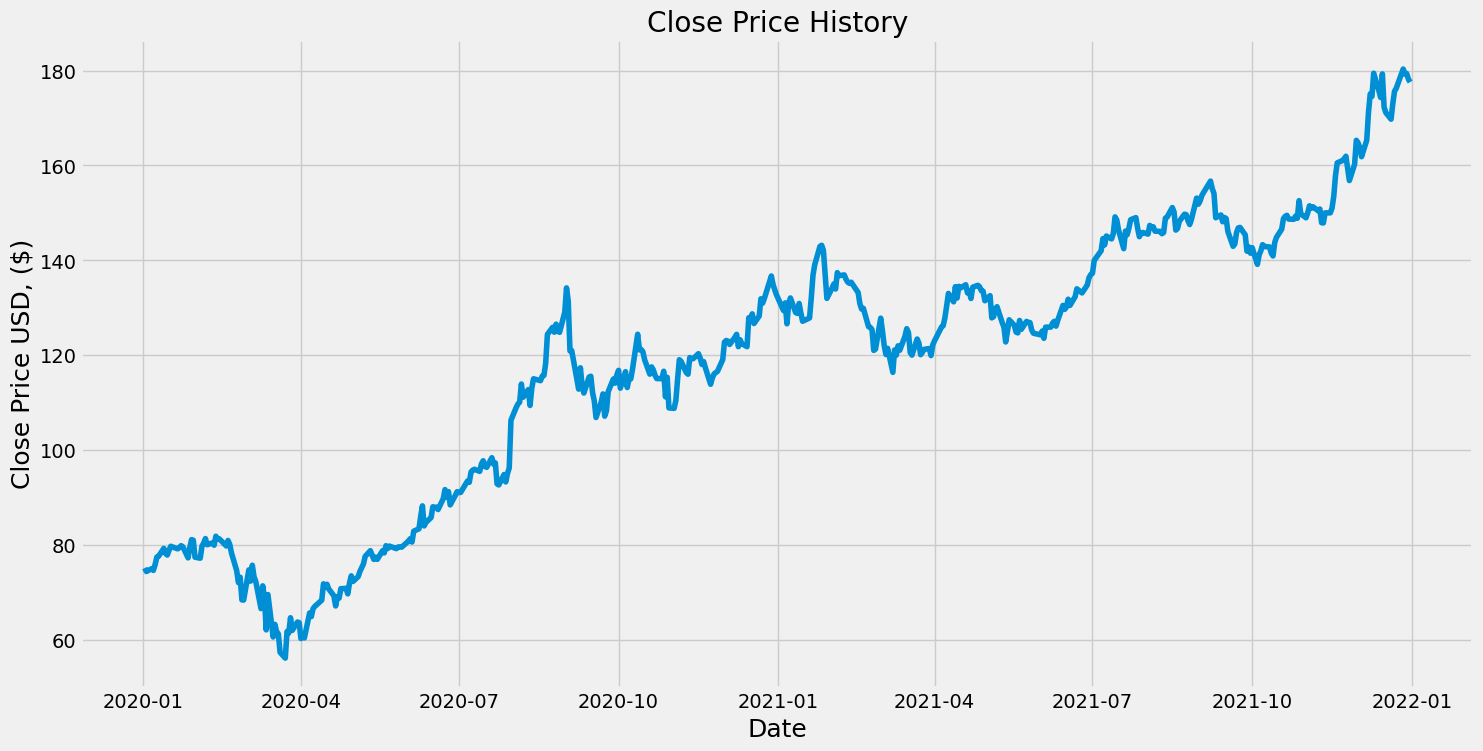

In [ ]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD, ($)', fontsize=18)
plt.show()

In [ ]:
# Dataframe with only 'Close' column
data = df.filter(['Close'])
dataset = data.values # convert to numpy array
training_data_len = math.ceil(len(dataset) * .8) # get the number of rows to train the model on 80% of datas

training_data_len

404

In [ ]:
#  Scale the data (normalize)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.15289266],
       [0.14701679],
       [0.15178588],
       [0.14894862],
       [0.15860752],
       [0.17156657],
       [0.17297513],
       [0.18631652],
       [0.17770399],
       [0.17500754],
       [0.1828554 ],
       [0.18987828],
       [0.18553176],
       [0.18780564],
       [0.19088442],
       [0.1890331 ],
       [0.17019824],
       [0.1877855 ],
       [0.20116712],
       [0.20022135],
       [0.17132511],
       [0.16961466],
       [0.19011975],
       [0.19535167],
       [0.20291779],
       [0.19249422],
       [0.19555285],
       [0.19164903],
       [0.20692225],
       [0.20223362],
       [0.20239464],
       [0.19042158],
       [0.19971828],
       [0.19303751],
       [0.17844852],
       [0.148526  ],
       [0.12820201],
       [0.13739812],
       [0.0989033 ],
       [0.09858132],
       [0.14979374],
       [0.13069727],
       [0.15770197],
       [0.13794148],
       [0.1301137 ],
       [0.08411312],
       [0.1226884 ],
       [0.102

In [ ]:
# Create the training data set
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i <= 61:
    print(x_train)
    print(y_train)
    print('\n')

[array([0.15289266, 0.14701679, 0.15178588, 0.14894862, 0.15860752,
       0.17156657, 0.17297513, 0.18631652, 0.17770399, 0.17500754,
       0.1828554 , 0.18987828, 0.18553176, 0.18780564, 0.19088442,
       0.1890331 , 0.17019824, 0.1877855 , 0.20116712, 0.20022135,
       0.17132511, 0.16961466, 0.19011975, 0.19535167, 0.20291779,
       0.19249422, 0.19555285, 0.19164903, 0.20692225, 0.20223362,
       0.20239464, 0.19042158, 0.19971828, 0.19303751, 0.17844852,
       0.148526  , 0.12820201, 0.13739812, 0.0989033 , 0.09858132,
       0.14979374, 0.13069727, 0.15770197, 0.13794148, 0.1301137 ,
       0.08411312, 0.1226884 , 0.10274675, 0.04801288, 0.10785794,
       0.03589901, 0.05732972, 0.04487373, 0.04107054, 0.0097998 ,
       0.        , 0.04529633, 0.04255963, 0.06855822, 0.04702688])]
[0.0612536506563659]


[array([0.15289266, 0.14701679, 0.15178588, 0.14894862, 0.15860752,
       0.17156657, 0.17297513, 0.18631652, 0.17770399, 0.17500754,
       0.1828554 , 0.18987828, 0.18

In [ ]:
#  Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(344, 60, 1)

In [ ]:
# LSTM Modael
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Comile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
344/344 [==============================] - 16s 33ms/step - loss: 0.0050
Epoch 2/5
344/344 [==============================] - 11s 32ms/step - loss: 0.0021
Epoch 3/5
344/344 [==============================] - 12s 36ms/step - loss: 0.0017
Epoch 4/5
344/344 [==============================] - 15s 45ms/step - loss: 0.0014
Epoch 5/5
344/344 [==============================] - 15s 43ms/step - loss: 0.0012


In [ ]:
#  Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


4/4 [==============================] - 1s 15ms/step


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse

4.333696422010365

<ipython-input-42-ad3b34f52ede>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


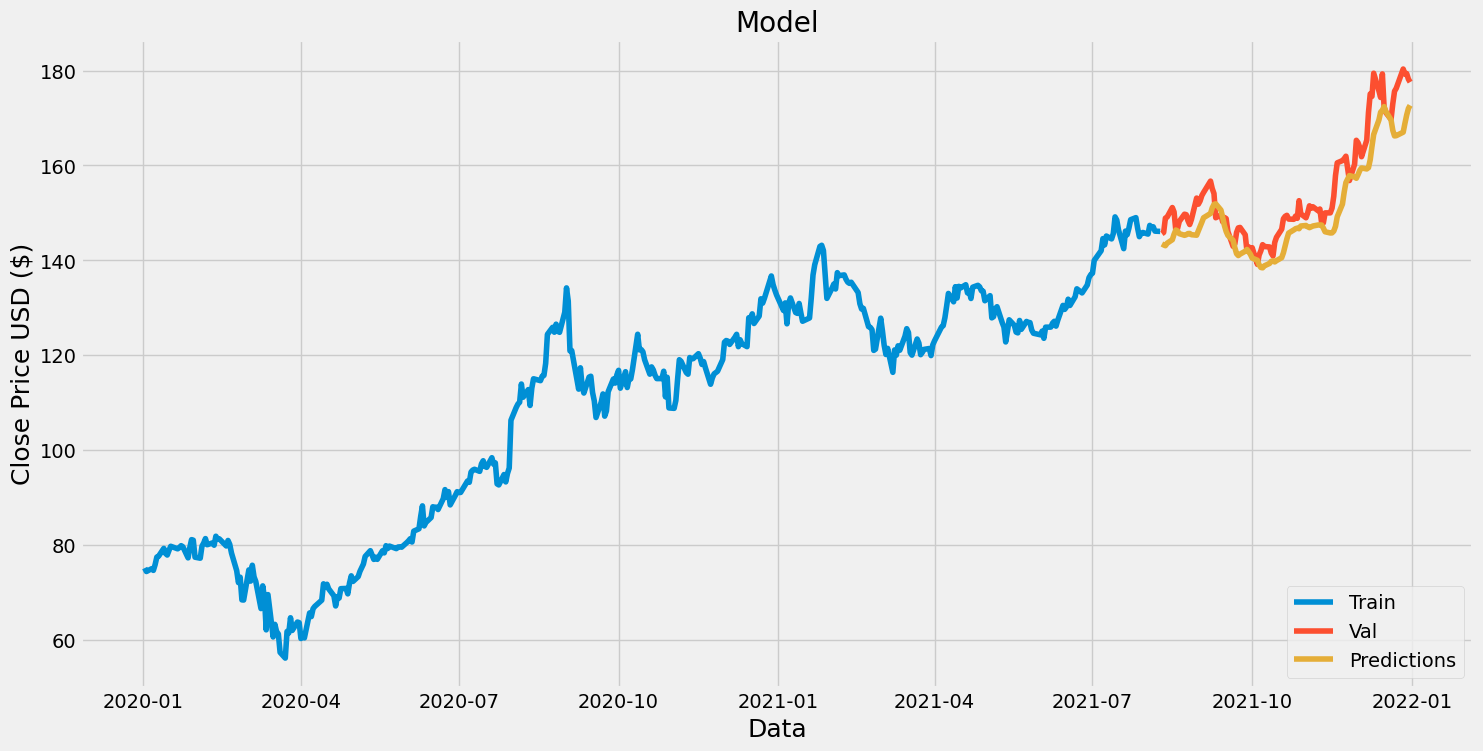

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted peices
valid

,Close,Predictions
Date,,
2021-08-10,145.600006,143.436295
2021-08-11,145.860001,143.241592
2021-08-12,148.889999,143.076508
2021-08-13,149.100006,143.591888
2021-08-16,151.119995,144.336868
...,...,...
2021-12-27,180.330002,167.011734
2021-12-28,179.289993,168.883224
2021-12-29,179.380005,170.621262


In [ ]:
# Get the quote
company = 'AAPL'
start = dt.datetime(2020,1,1)
end =  dt.datetime(2022,1,1)
quote = yf.download(company, start, end)

new_df = quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 42ms/step
[[172.71355]]


In [ ]:
# Get the quote
company = 'AAPL'
start = dt.datetime(2023,7,1)
end =  dt.datetime(2023,7,2)
quote2 = yf.download(company, start, end)
print(quote2['Close'])

[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-01 00:00:00 -> 2023-07-02 00:00:00)')



Series([], Name: Close, dtype: float64)
